In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

In [7]:
fear_greed = pd.read_csv("csv_files/fear_greed_index.csv")
historical = pd.read_csv("csv_files/historical_data.csv")

In [8]:
print("Fear & Greed Data (first 5 rows):")
display(fear_greed.head())

print("\nHistorical Data (first 5 rows):")
display(historical.head())

Fear & Greed Data (first 5 rows):


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



Historical Data (first 5 rows):


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [10]:
print("Fear & Greed Columns:", fear_greed.columns.tolist())
print("Historical Data Columns:", historical.columns.tolist())

Fear & Greed Columns: ['timestamp', 'value', 'classification', 'date']
Historical Data Columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


In [11]:
fear_greed.rename(columns={
    "classification": "Sentiment"
}, inplace=True)

In [12]:
historical.rename(columns={
    "Account": "account",
    "Coin": "symbol",
    "Execution Price": "execution_price",
    "Size Tokens": "size_tokens",
    "Size USD": "size_usd",
    "Side": "side",
    "Timestamp IST": "time",
    "Start Position": "start_position",
    "Direction": "direction",
    "Closed PnL": "closedPnL",
    "Transaction Hash": "tx_hash",
    "Order ID": "order_id",
    "Crossed": "crossed",
    "Fee": "fee",
    "Trade ID": "trade_id",
    "Timestamp": "timestamp"
}, inplace=True)

In [16]:
fear_greed['date'] = pd.to_datetime(fear_greed['date'], errors='coerce')
historical['time'] = pd.to_datetime(historical['time'], dayfirst=True, errors='coerce')

fear_greed['date'] = fear_greed['date'].dt.date
historical['date'] = historical['time'].dt.date

In [19]:
merged = historical.merge(
    fear_greed[['date', 'Sentiment']],
    on='date',
    how='left'
)

print("\nMerged Data Sample:")
display(merged.head())


Merged Data Sample:


,account,symbol,execution_price,size_tokens,size_usd,side,time,start_position,direction,closedPnL,tx_hash,order_id,crossed,fee,trade_id,timestamp,date,Sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [21]:
import os

# Create outputs folder if not exists
os.makedirs("outputs", exist_ok=True)


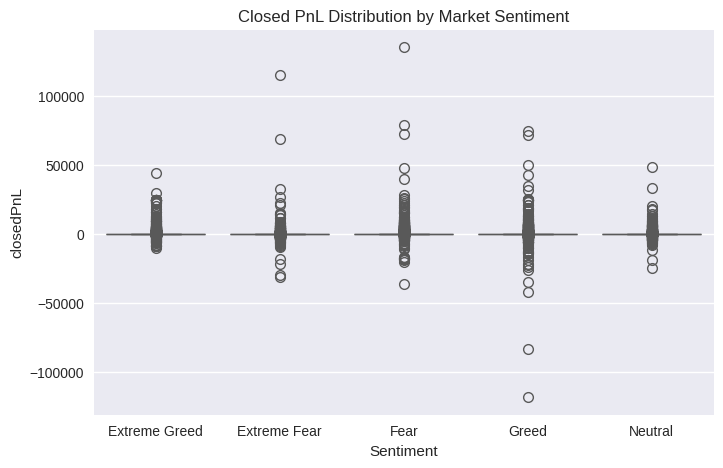

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Sentiment", y="closedPnL", data=merged)
plt.title("Closed PnL Distribution by Market Sentiment")
plt.savefig("outputs/pnl_by_sentiment.png")
plt.show()

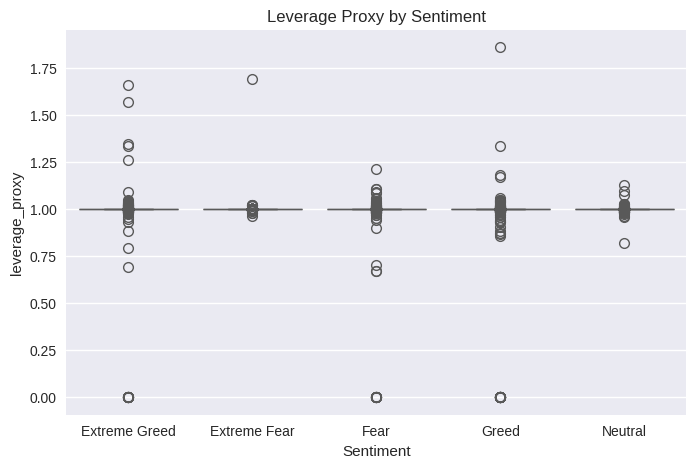

In [23]:
merged['leverage_proxy'] = merged['size_usd'] / (merged['execution_price'] * merged['size_tokens'])

plt.figure(figsize=(8,5))
sns.boxplot(x="Sentiment", y="leverage_proxy", data=merged)
plt.title("Leverage Proxy by Sentiment")
plt.savefig("outputs/leverage_by_sentiment.png")
plt.show()

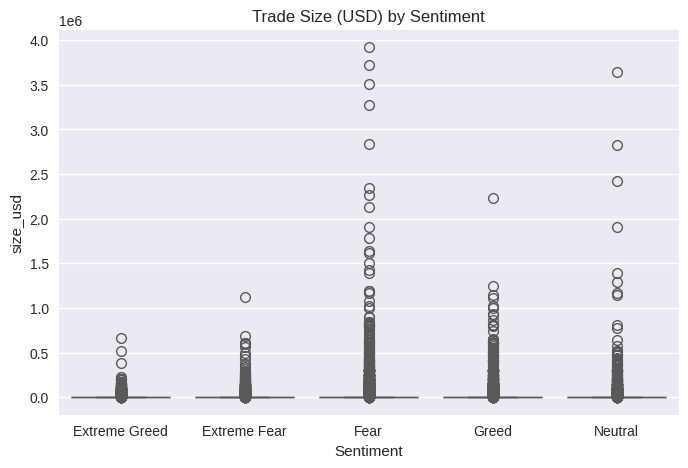

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Sentiment", y="size_usd", data=merged)
plt.title("Trade Size (USD) by Sentiment")
plt.savefig("outputs/trade_size_by_sentiment.png")
plt.show()

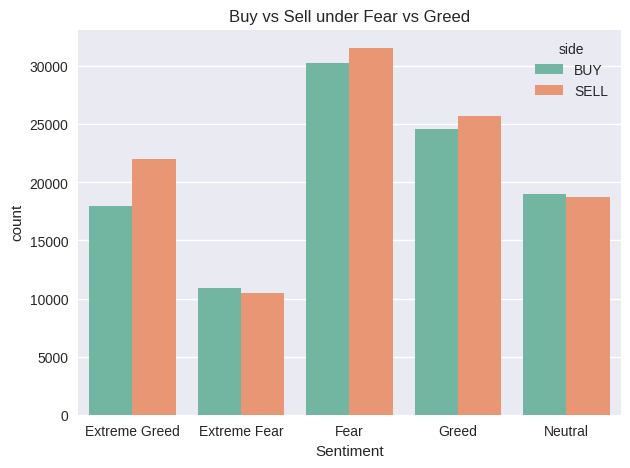

In [25]:
plt.figure(figsize=(7,5))
sns.countplot(x="Sentiment", hue="side", data=merged)
plt.title("Buy vs Sell under Fear vs Greed")
plt.savefig("outputs/side_distribution.png")
plt.show()

/tmp/ipython-input-3406728988.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Sentiment", y="closedPnL", data=account_pnl, ci=None)


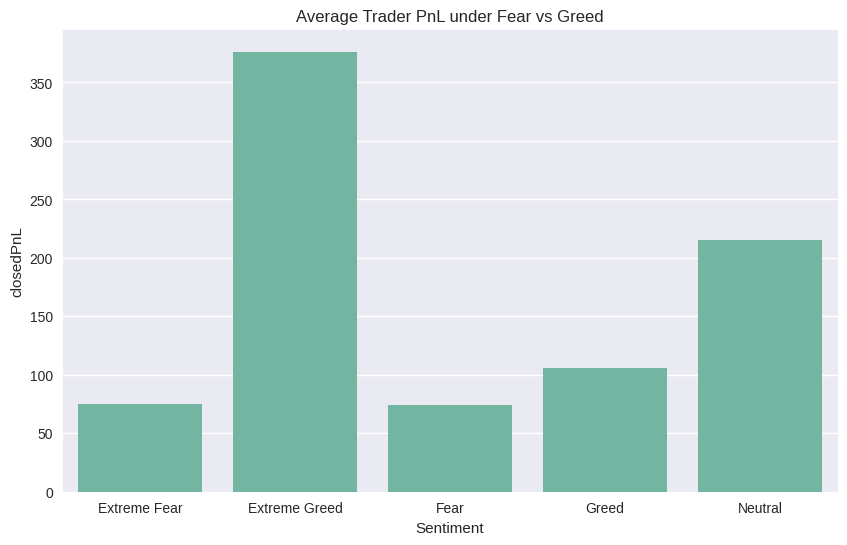

In [26]:
account_pnl = merged.groupby(['account','Sentiment'])['closedPnL'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x="Sentiment", y="closedPnL", data=account_pnl, ci=None)
plt.title("Average Trader PnL under Fear vs Greed")
plt.savefig("outputs/account_pnl_sentiment.png")
plt.show()

In [27]:
merged.to_csv("csv_files/merged_data.csv", index=False)
print("\nProcessed merged_data.csv saved.")


Processed merged_data.csv saved.
